In [1]:
%matplotlib inline

import numpy as np
import copy
import matplotlib.pyplot as plt
import pickle
import random
import torch
from utils import torch_from_numpy
import datetime

from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early, cfg_policy_evaluation_maxiter
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

from config import cfg_alpha
alpha=cfg_alpha

num_iter_max=200000
env_name = 'CustomPendulum-v0'
env_str=cfg_env
figfilenamehead = "fig_policy_optimization_"+env_str+"_iter2_"

loss_list = []
normalized_loss_list = []

policy_evaluation_maxiter = cfg_policy_evaluation_maxiter
print("policy_evaluation_maxiter",policy_evaluation_maxiter)
print("alpha",alpha)
print("seed",seed)
print(datetime.datetime.now())

policy_evaluation_maxiter 5
alpha 0.1
seed 0
2023-07-09 09:32:59.307600


In [2]:
import gym
import custom_gym
env = gym.make(env_name)

np.random.seed(seed)
random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)



2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:


from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
agent = SAC(env.observation_space.shape[0]+z_dim*2, env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_bamdp_weightedvae_")


offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))
debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_bamdp_weightedvae_


In [4]:
args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":agent.policy.my_np_select_action,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}
# import vi_base
# vi = vi_base.baseVI(args_init_dict)
import vi_iw
iwvi = vi_iw.iwVI(args_init_dict)

# iwvi.load_base(ckpt_key="unweighted")
iwvi.load(ckpt_key="policy_optimization_iter1")

dec: h_dim 48
iwvi load ckpt1, ckpt2 ckpt_iwvi_basepartpendulum_policy_optimization_iter1 ckpt_iwvi_pendulum_policy_optimization_iter1
base load ckpt ckpt_basevi_pendulum_policy_optimization_iter1
base load self.initial_belief.data.sum() tensor(-0.6462)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-0.5862)
penalty_target_min tensor(-6.1621) penalty_target_max tensor(26.8864)
train_loss:  -5.10538476523161
valid_loss:  -4.548567172622681
h_min_tilde -6.1621227 ell_tilde -4.994021246709824 kappa_tilde 0.0009252513191617171
success load ckpt_iwvi_basepartpendulum_policy_optimization_iter1
train_loss:  -1.3202007345944644
valid_loss:  -0.5772622339010239
weight_alpha 1.0 h_min_tilde -6.1621227 ell_tilde -1.1716130344557762 kappa_tilde 0.0004476386201149209


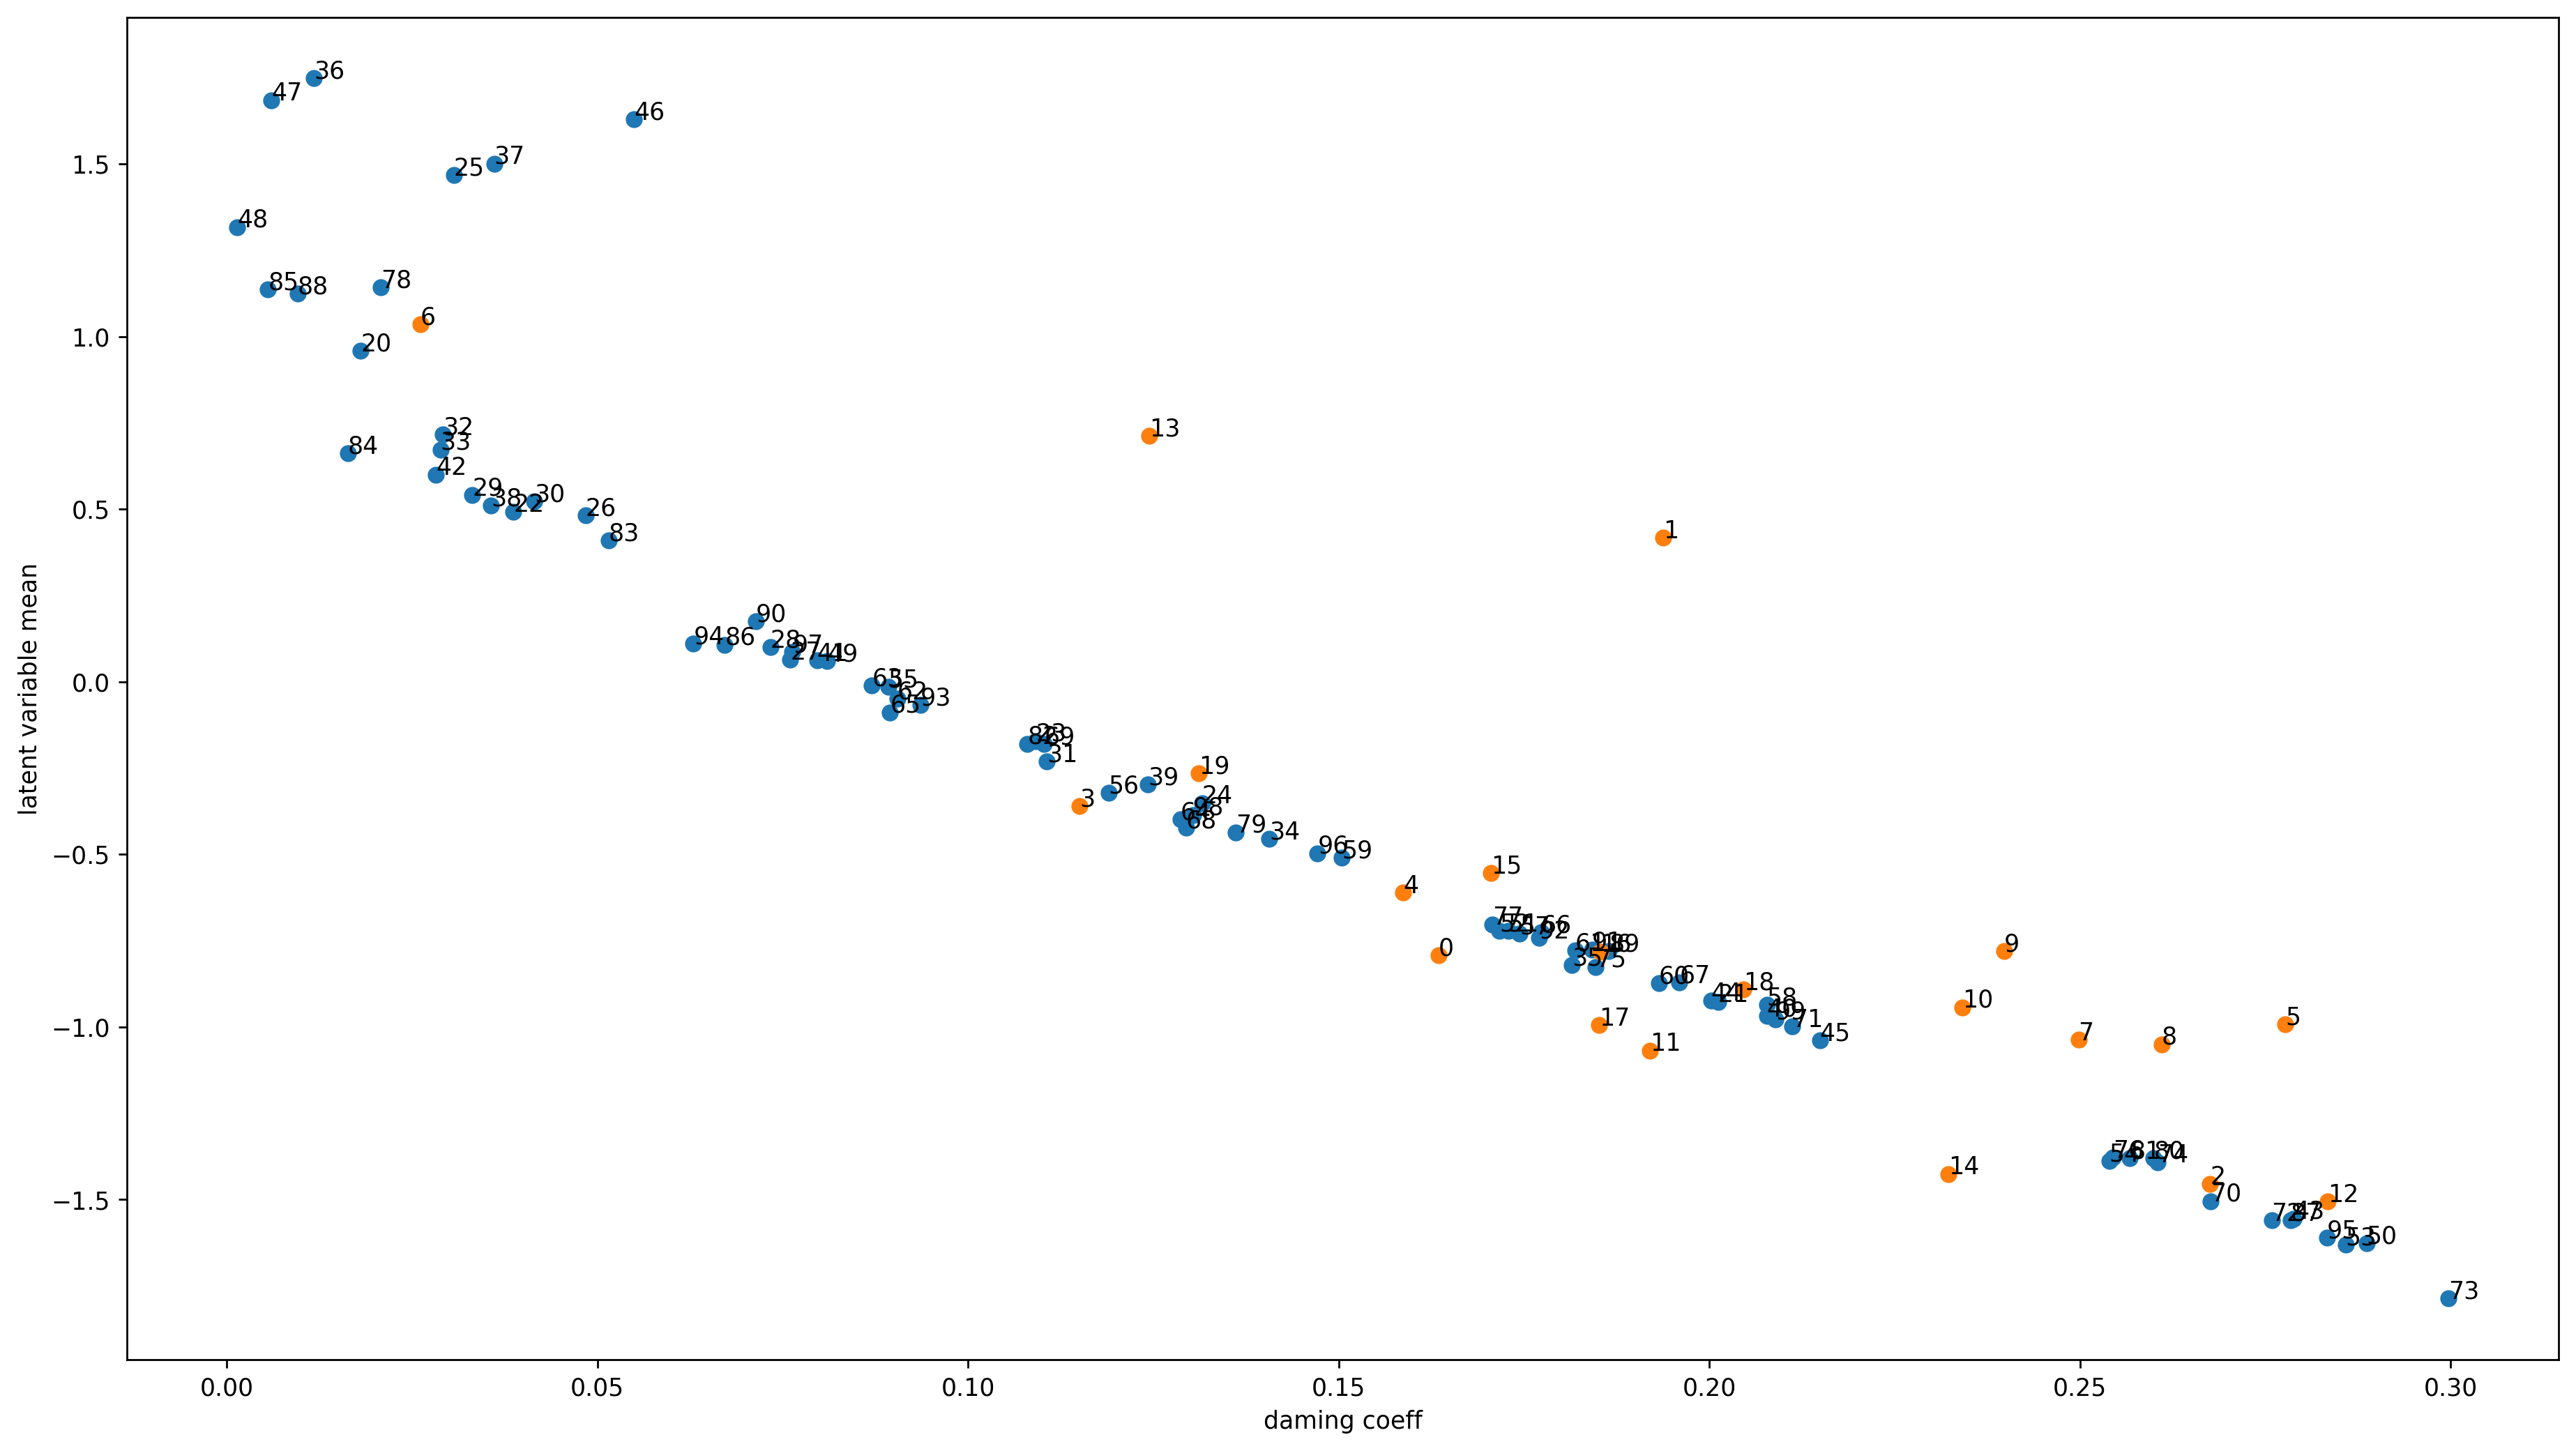

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757]
[0.23415875 0.19197631 0.28340068 0.12439858 0.23227011 0.17053018
 0.18529065 0.1850802  0.20454609 0.13110959]
[0.01806764 0.20119136 0.03867789 0.10911323 0.13158045 0.03061344
 0.04839286 0.07598748 0.07332768 0.03311254]
[0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789 ]
[0.20774164 0.07961685 0.02818215 0.27878886 0.20022311 0.21489816
 0.05495741 0.00603226 0.00140864 0.08100239]
[0.28865656 0.1728472  0.17167557 0.2858247  0.2539226  0.08923109
 0.11895172 0.17438186 0.20775948 0.15039731]
[0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856]
[0.26757701 0.21116658 0.27584478 0.2996541  0.26043782 0.18466787
 0.25440247 0.17073022 0.0207501  0.1360628 ]
[0.2599147  0.256741   0.10799342 0.0514889  0.0163014  0.00555654
 0.06717741 0.27842439 0.00955

In [5]:
plt.figure(figsize=(18,10), dpi=250)
np_mulogvar = iwvi.mulogvar_offlinedata.numpy()
plt.xlabel("daming coeff")
plt.ylabel("latent variable mean")

plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# plt.xlim([-0.05,0.35])
for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.png")
plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.eps")
# plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.pdf")
plt.show()


for i in range(10):
    print(debug_info[i*10 : (i+1)*10,1])
# plt.show()
print("摩擦係数-潜在変数")

In [6]:
iwvi.get_real_rollout_bamdppolicy_data()


 0 7.152557373046875e-07


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ


 1 6.23185133934021

 2 7.451921224594116

 3 6.369833707809448

 4 4.788243293762207

 5 3.6502065658569336

 6 3.669156789779663

 7 3.8863279819488525

 8 3.7712111473083496

 9 3.6081361770629883

 10 3.591146230697632

 11 3.792490243911743

 12 3.788212776184082

 13 3.6559977531433105

 14 3.5594215393066406

 15 3.7600831985473633

 16 3.543870687484741

 17 3.5639724731445312

 18 3.6998915672302246

 19 3.6565752029418945

 20 3.563237190246582

 21 3.582512140274048

 22 3.5228562355041504

 23 3.598729133605957

 24 3.4945285320281982

 25 3.694950819015503

 26 3.747486114501953

 27 3.575220823287964

 28 3.4683520793914795

 29 3.619997262954712

 30 3.7337646484375

 31 3.6332736015319824

 32 3.551345109939575

 33 3.6008729934692383

 34 3.5351903438568115

 35 3.5598714351654053

 36 3.481604814529419

 37 3.574324607849121

 38 3.41976261138916

 39 3.4810893535614014

 40 3.685614585876465

 41 3.5876505374908447

 42 3.591064214706421

 43 3.625349521636963

 44 

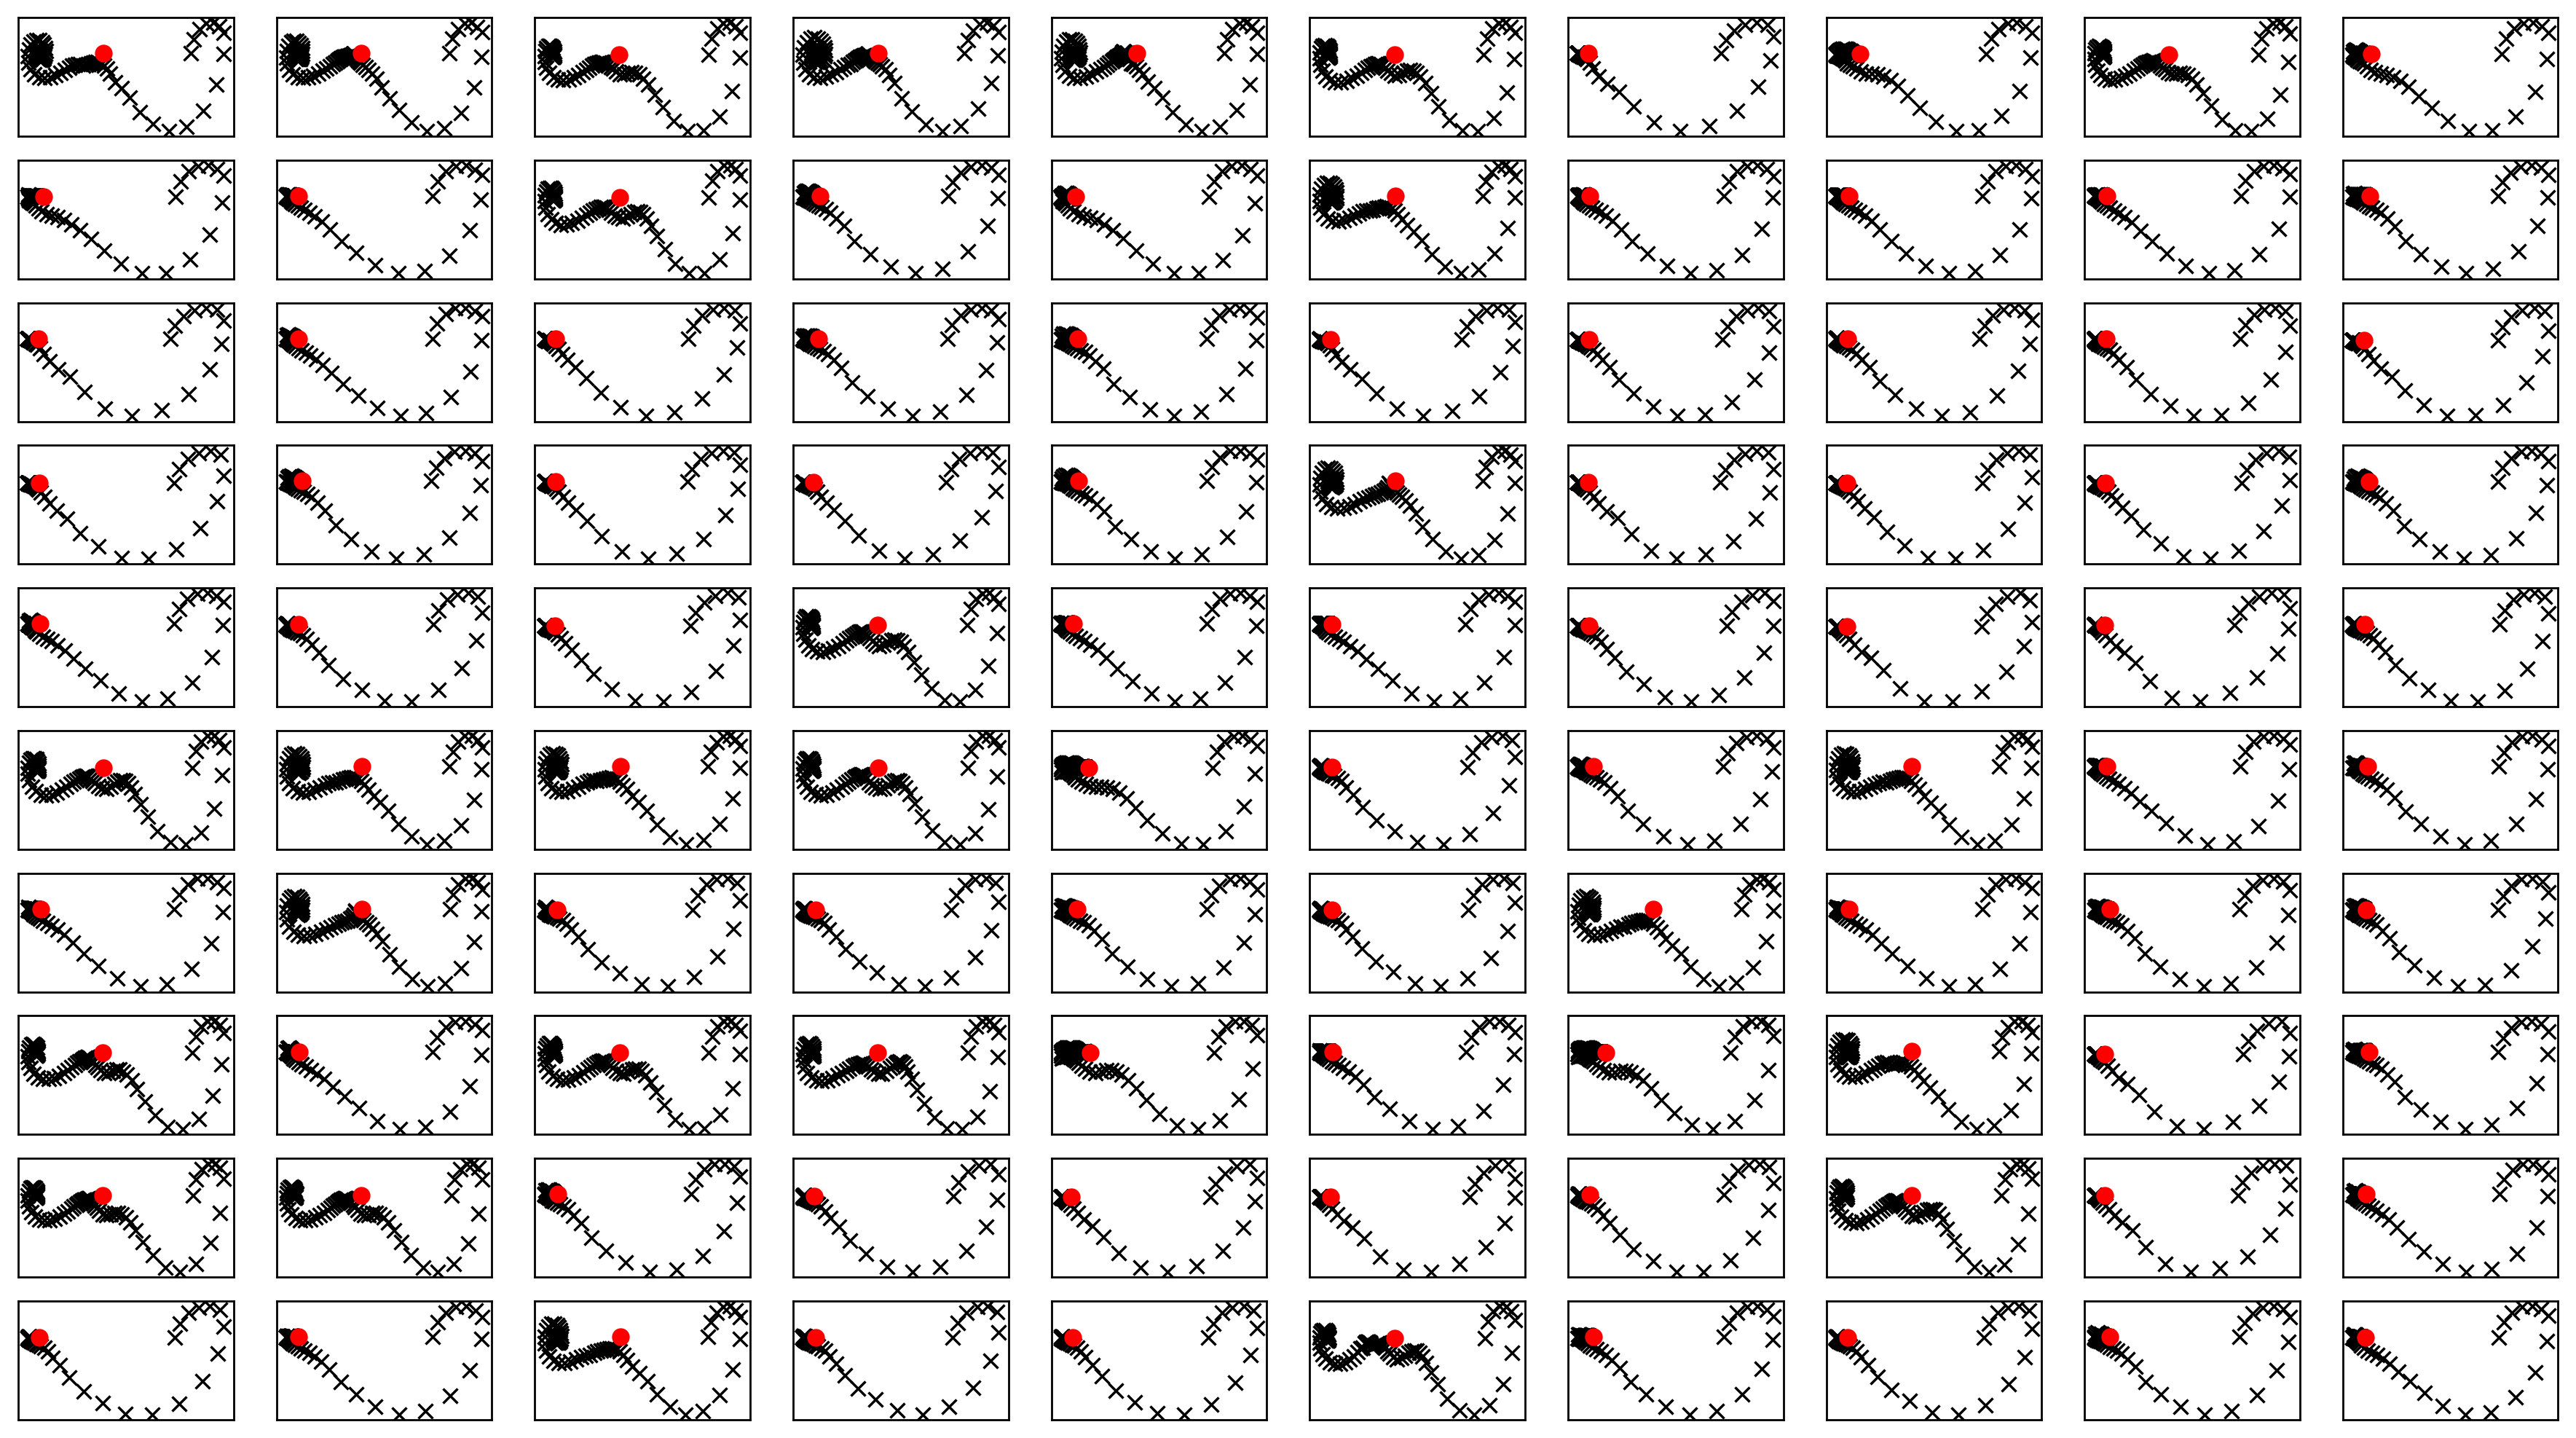

In [7]:
fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro") 
plt.show()

In [8]:
# iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
# simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
# simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)

実環境方策rollout vs Sim環境方策rollout


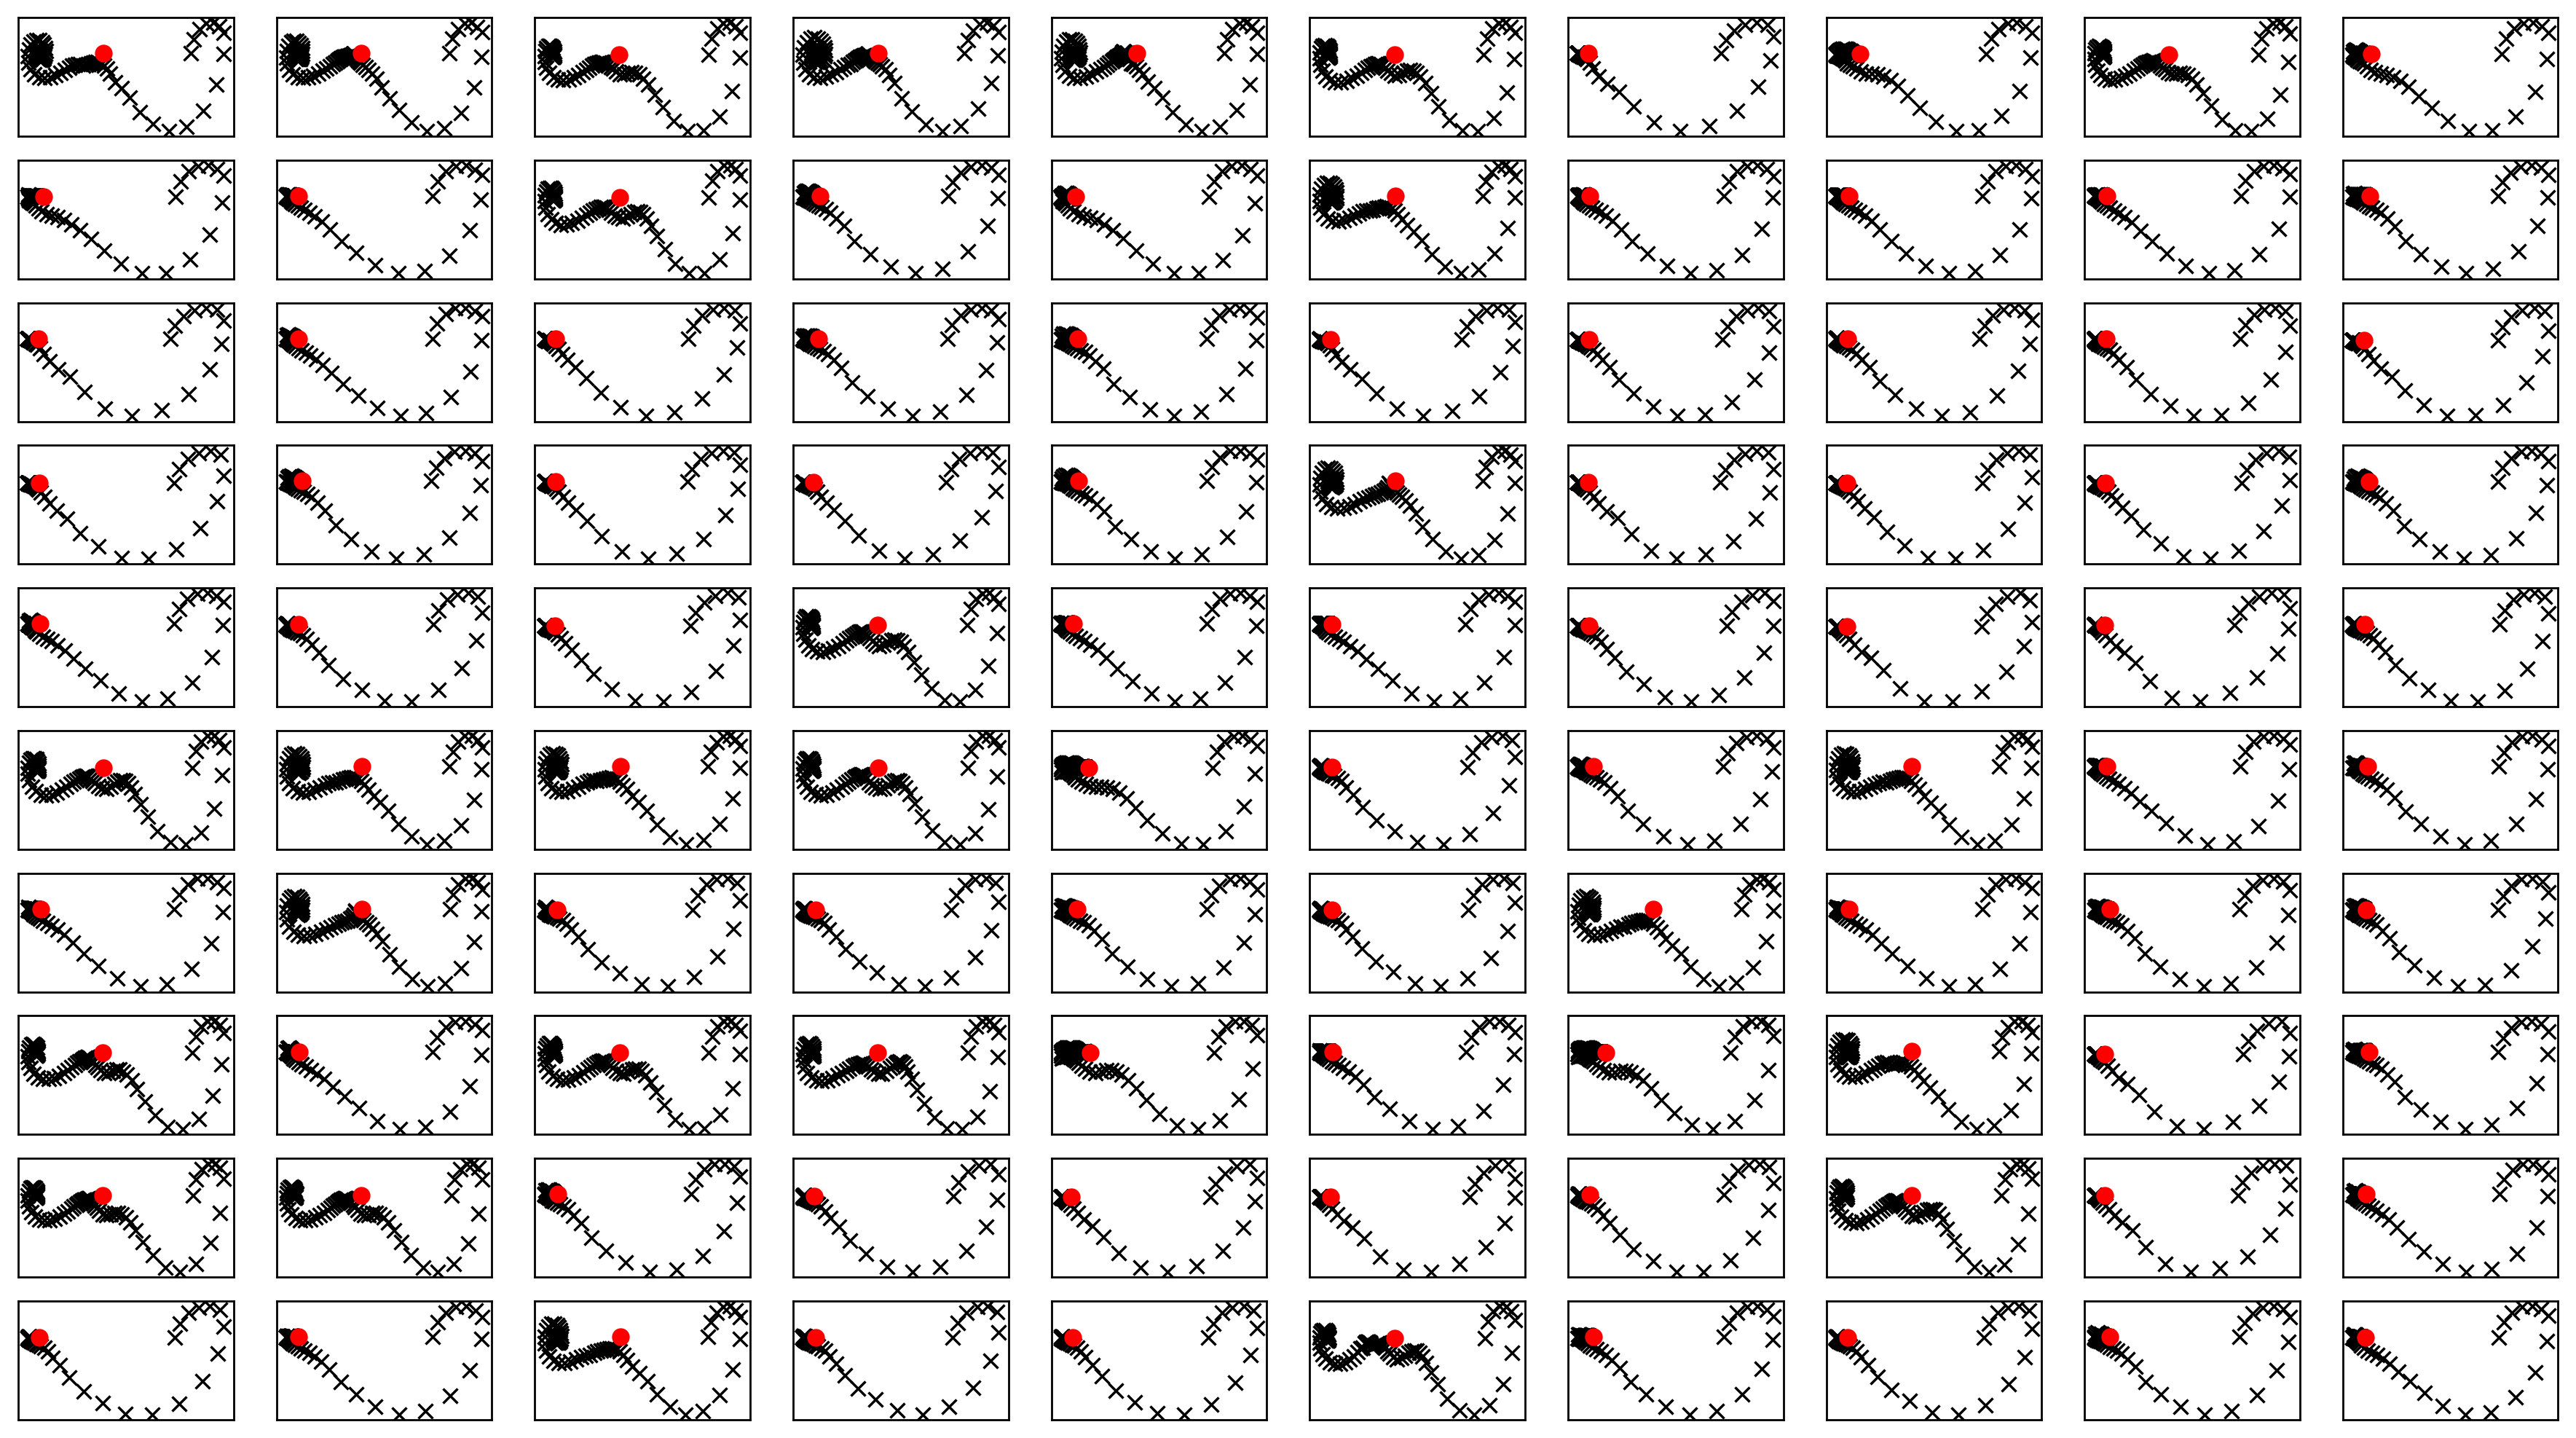

In [9]:


fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
#     ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
#     ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1])
    
#     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
    ax_list[-1].plot(0, 0,"ro") 

plt.savefig(figfilenamehead+"iter0.png")
# plt.savefig(figfilenamehead+"iter0.pdf")
plt.savefig(figfilenamehead+"iter0.eps")
print("実環境方策rollout vs Sim環境方策rollout")

In [10]:
print(datetime.datetime.now())

2023-07-09 09:39:32.607117


# Iter 1

In [11]:
policy_evaluation_iter=0

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    iwvi.get_sim_rollout_bamdppolicy_data_randomstop()


 0

 1

 2

 3

 4

 5

 6

 7

 8

 9

 10

 11

 12

 13

 14

 15

 16

 17

 18

 19

 20

 21

 22

 23

 24

 25

 26

 27

 28

 29

 30

 31

 32

 33

 34

 35

 36

 37

 38


In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    iwvi.train_ratio(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, policy=agent.select_action)


In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    loss_list.append(iwvi.eval_loss(weight_alpha=1.))
    normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))
    if 0:
        iwvi.tmp2_store_encdec()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:


    fig = plt.figure(figsize=(18,10), dpi=250)
    ax_list = []
    # min_val = min([iwvi.offlinedata_weight[i].min().numpy() for i in range(len(offline_data))])
    # max_val = max([iwvi.offlinedata_weight[i].max().numpy() for i in range(len(offline_data))])
    min_val = 1e-8
    max_val = 1e3
    print(min_val, max_val)

    for i in range(len(offline_data)):
        ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
        ax_list[-1].set_xticks([])
        ax_list[-1].set_yticks([])
        ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
        ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=np.log10(iwvi.offlinedata_weight[i].numpy()), vmin=np.log10(min_val), vmax=np.log10(max_val), s=5) 
    plt.savefig(figfilenamehead+"weight_iter1.png")

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    train_curve1, valid_curve1 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, weight_alpha=alpha, flag=1)
    iwvi.update_mulogvar_offlinedata()

    # train_curve2, valid_curve2 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=default_early, weight_alpha=alpha, flag=2)
    # iwvi.update_mulogvar_offlinedata()

    # train_curve3, valid_curve3 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=default_early, weight_alpha=alpha, flag=3)
    # iwvi.update_mulogvar_offlinedata()

In [ ]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()
print("alpha",alpha, "default_lr", default_lr)

In [ ]:
# iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
# simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
# simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
# simdata0c = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_data_fixlen()
# simdata0d = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_data_fixlen()
# simdata0e = copy.deepcopy(iwvi.simenv_rolloutdata)



In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    fig = plt.figure(figsize=(18,10), dpi=250)
    fig.patch.set_facecolor('white')
    ax_list = []
    for i in range(len(offline_data)):
        ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
        ax_list[-1].set_xticks([])
        ax_list[-1].set_yticks([])
    #     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
    #     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    #     ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    #     ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
    #     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 
    #     ax_list[-1].plot(simdata0d[i][:,0], simdata0d[i][:,1]) 
    #     ax_list[-1].plot(simdata0e[i][:,0], simdata0e[i][:,1]) 

        ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
        ax_list[-1].plot(0, 0,"ro")     
    plt.savefig(figfilenamehead+"iter1.png")
    plt.savefig(figfilenamehead+"iter1.eps")
    # plt.savefig(figfilenamehead+"iter1.pdf")
    print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    plt.figure(figsize=(16,12))
    np_mulogvar = iwvi.mulogvar_offlinedata.numpy()


    plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
    plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
    # plt.xlim([0,0.3])
    for i in range(len(debug_info)):
        plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
    plt.savefig(figfilenamehead+"damping_latent_iter1.png")
    plt.savefig(figfilenamehead+"damping_latent_iter1.eps")
    # plt.savefig(figfilenamehead+"damping_latent_iter1.pdf")
    plt.show()

    # plt.figure(figsize=(16,12))
    # plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
    # plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
    # plt.plot([bif_c, bif_c],[np_mulogvar[:,0].min(),np_mulogvar[:,0].max()])
    # for i in range(len(debug_info)):
    #     plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
    # plt.xlim([0.06,0.14])
    # plt.show()


    for i in range(10):
        print(debug_info[i*10 : (i+1)*10,1])
    # plt.show()
    print("摩擦係数-潜在変数")

In [ ]:
print(datetime.datetime.now())

# Iter2

In [ ]:
policy_evaluation_iter=1
if policy_evaluation_iter<policy_evaluation_maxiter:
    iwvi.get_sim_rollout_bamdppolicy_data_randomstop()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    iwvi.train_ratio(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, policy=agent.select_action)


In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    loss_list.append(iwvi.eval_loss(weight_alpha=1.))
    normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))
    if 0:
        iwvi.tmp2_store_encdec()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    fig = plt.figure(figsize=(18,10), dpi=250)
    ax_list = []
    # min_val = min([iwvi.offlinedata_weight[i].min().numpy() for i in range(len(offline_data))])
    # max_val = max([iwvi.offlinedata_weight[i].max().numpy() for i in range(len(offline_data))])
    min_val = 1e-8
    max_val = 1e3
    print(min_val, max_val)

    for i in range(len(offline_data)):
        ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
        ax_list[-1].set_xticks([])
        ax_list[-1].set_yticks([])
        ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
        ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=np.log10(iwvi.offlinedata_weight[i].numpy()), vmin=np.log10(min_val), vmax=np.log10(max_val), s=5) 
    plt.savefig(figfilenamehead+"weight_iter2.png")

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    train_curve1, valid_curve1 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, weight_alpha=alpha, flag=1)
    iwvi.update_mulogvar_offlinedata()

#         train_curve2, valid_curve2 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, weight_alpha=alpha, flag=2)
#         iwvi.update_mulogvar_offlinedata()

#         train_curve3, valid_curve3 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, weight_alpha=alpha, flag=3)
#         iwvi.update_mulogvar_offlinedata()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    plt.plot(train_curve1)
    plt.plot(valid_curve1)
    plt.show()

    # plt.plot(train_curve2)
    # plt.plot(valid_curve2)
    # plt.show()

    # plt.plot(train_curve3)
    # plt.plot(valid_curve3)
    # plt.show()
    print("alpha",alpha, "default_lr", default_lr)

In [ ]:
# iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
# simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
# simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
# simdata0c = copy.deepcopy(iwvi.simenv_rolloutdata)


In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    fig = plt.figure(figsize=(18,10), dpi=250)
    fig.patch.set_facecolor('white')
    ax_list = []
    for i in range(len(offline_data)):
        ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
        ax_list[-1].set_xticks([])
        ax_list[-1].set_yticks([])
    #     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
    #     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    #     ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    #     ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
    #     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

        ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
        ax_list[-1].plot(0, 0,"ro")     
    plt.savefig(figfilenamehead+"joint_iter2.png")
    plt.savefig(figfilenamehead+"joint_iter2.eps")
    # plt.savefig(figfilenamehead+"joint_iter2.pdf")

    print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    plt.figure(figsize=(16,12))
    np_mulogvar = iwvi.mulogvar_offlinedata.numpy()


    plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
    plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
    # plt.xlim([0,0.3])
    for i in range(len(debug_info)):
        plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
    plt.savefig(figfilenamehead+"damping_latent_iter2.png")
    plt.savefig(figfilenamehead+"damping_latent_iter2.eps")
    # plt.savefig(figfilenamehead+"damping_latent_iter2.pdf")
    plt.show()


    for i in range(10):
        print(debug_info[i*10 : (i+1)*10,1])
    # plt.show()
    print("摩擦係数-潜在変数")

In [ ]:
print(datetime.datetime.now())

In [ ]:
# loss_array = np.array(loss_list)
# plt.figure(figsize=(16,12))
# plt.plot(loss_array[:,0])
# plt.xlabel("iteration")
# plt.ylabel("loss")


In [ ]:
# normalized_loss_array = np.array(normalized_loss_list)
# plt.figure(figsize=(16,12))
# plt.plot(normalized_loss_array[:,0])
# plt.xlabel("iteration")
# plt.ylabel("loss")


# Iter 3

In [ ]:
policy_evaluation_iter=2
if policy_evaluation_iter<policy_evaluation_maxiter:
    iwvi.get_sim_rollout_bamdppolicy_data_randomstop()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    iwvi.train_ratio(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, policy=agent.select_action)


In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    loss_list.append(iwvi.eval_loss(weight_alpha=1.))
    normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))
    if 0:
        iwvi.tmp2_store_encdec()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    fig = plt.figure(figsize=(18,10), dpi=250)
    ax_list = []
    # min_val = min([iwvi.offlinedata_weight[i].min().numpy() for i in range(len(offline_data))])
    # max_val = max([iwvi.offlinedata_weight[i].max().numpy() for i in range(len(offline_data))])
    min_val = 1e-8
    max_val = 1e3
    print(min_val, max_val)

    for i in range(len(offline_data)):
        ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
        ax_list[-1].set_xticks([])
        ax_list[-1].set_yticks([])
        ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
        ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=np.log10(iwvi.offlinedata_weight[i].numpy()), vmin=np.log10(min_val), vmax=np.log10(max_val), s=5) 
    plt.savefig(figfilenamehead+"weight_iter3.png")

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    train_curve1, valid_curve1 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, weight_alpha=alpha, flag=1)
    iwvi.update_mulogvar_offlinedata()

    # train_curve2, valid_curve2 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=2)
    # iwvi.update_mulogvar_offlinedata()

    # train_curve3, valid_curve3 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=3)
    # iwvi.update_mulogvar_offlinedata()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    plt.plot(train_curve1)
    plt.plot(valid_curve1)
    plt.show()

    # plt.plot(train_curve2)
    # plt.plot(valid_curve2)
    # plt.show()

    # plt.plot(train_curve3)
    # plt.plot(valid_curve3)
    # plt.show()
    print("alpha",alpha, "default_lr", default_lr)

In [ ]:
# iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
# simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
# simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
# simdata0c = copy.deepcopy(iwvi.simenv_rolloutdata)



In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    fig = plt.figure(figsize=(18,10), dpi=250)
    fig.patch.set_facecolor('white')
    ax_list = []
    for i in range(len(offline_data)):
        ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
        ax_list[-1].set_xticks([])
        ax_list[-1].set_yticks([])
    #     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
    #     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    #     ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    #     ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
    #     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

        ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
        ax_list[-1].plot(0, 0,"ro") 
    plt.savefig(figfilenamehead+"joint_iter3.png")
    plt.savefig(figfilenamehead+"joint_iter3.eps")
    # plt.savefig(figfilenamehead+"joint_iter3.pdf")

    print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    plt.figure(figsize=(16,12))
    np_mulogvar = iwvi.mulogvar_offlinedata.numpy()


    plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
    plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
    # plt.xlim([0,0.3])
    for i in range(len(debug_info)):
        plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
    plt.savefig(figfilenamehead+"damping_latent_iter3.png")
    plt.savefig(figfilenamehead+"damping_latent_iter3.eps")
    # plt.savefig(figfilenamehead+"damping_latent_iter3.pdf")
    plt.show()


    for i in range(10):
        print(debug_info[i*10 : (i+1)*10,1])
    # plt.show()
    print("摩擦係数-潜在変数")

In [ ]:
print(datetime.datetime.now())

# Iter 4

In [ ]:
policy_evaluation_iter=3

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    iwvi.get_sim_rollout_bamdppolicy_data_randomstop()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    iwvi.train_ratio(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, policy=agent.select_action)


In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    loss_list.append(iwvi.eval_loss(weight_alpha=1.))
    normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))
    if 0:
        iwvi.tmp2_store_encdec()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    fig = plt.figure(figsize=(18,10), dpi=250)
    ax_list = []
    # min_val = min([iwvi.offlinedata_weight[i].min().numpy() for i in range(len(offline_data))])
    # max_val = max([iwvi.offlinedata_weight[i].max().numpy() for i in range(len(offline_data))])
    min_val = 1e-8
    max_val = 1e3
    print(min_val, max_val)

    for i in range(len(offline_data)):
        ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
        ax_list[-1].set_xticks([])
        ax_list[-1].set_yticks([])
        ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
        ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=np.log10(iwvi.offlinedata_weight[i].numpy()), vmin=np.log10(min_val), vmax=np.log10(max_val), s=5) 
    plt.savefig(figfilenamehead+"weight_iter4.png")

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    train_curve1, valid_curve1 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, weight_alpha=alpha, flag=1)
    iwvi.update_mulogvar_offlinedata()

    # train_curve2, valid_curve2 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=2)
    # iwvi.update_mulogvar_offlinedata()

    # train_curve3, valid_curve3 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=3)
    # iwvi.update_mulogvar_offlinedata()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    plt.plot(train_curve1)
    plt.plot(valid_curve1)
    plt.show()

    # plt.plot(train_curve2)
    # plt.plot(valid_curve2)
    # plt.show()

    # plt.plot(train_curve3)
    # plt.plot(valid_curve3)
    # plt.show()
    print("alpha",alpha, "default_lr", default_lr)

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    fig = plt.figure(figsize=(18,10), dpi=250)
    fig.patch.set_facecolor('white')
    ax_list = []
    for i in range(len(offline_data)):
        ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
        ax_list[-1].set_xticks([])
        ax_list[-1].set_yticks([])
    #     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
    #     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    #     ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    #     ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
    #     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

        ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
        ax_list[-1].plot(0, 0,"ro") 
    plt.savefig(figfilenamehead+"joint_iter4.png")
    plt.savefig(figfilenamehead+"joint_iter4.eps")
    # plt.savefig(figfilenamehead+"joint_iter3.pdf")

    print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    plt.figure(figsize=(16,12))
    np_mulogvar = iwvi.mulogvar_offlinedata.numpy()


    plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
    plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
    # plt.xlim([0,0.3])
    for i in range(len(debug_info)):
        plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
    plt.savefig(figfilenamehead+"damping_latent_iter4.png")
    plt.savefig(figfilenamehead+"damping_latent_iter4.eps")
    # plt.savefig(figfilenamehead+"damping_latent_iter3.pdf")
    plt.show()


    for i in range(10):
        print(debug_info[i*10 : (i+1)*10,1])
    # plt.show()
    print("摩擦係数-潜在変数")

In [ ]:
print(datetime.datetime.now())

# Iter 5

In [ ]:
policy_evaluation_iter=4

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    iwvi.get_sim_rollout_bamdppolicy_data_randomstop()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    iwvi.train_ratio(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, policy=agent.select_action)


In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    loss_list.append(iwvi.eval_loss(weight_alpha=1.))
    normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))
    if 0:
        iwvi.tmp2_store_encdec()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    fig = plt.figure(figsize=(18,10), dpi=250)
    ax_list = []
    # min_val = min([iwvi.offlinedata_weight[i].min().numpy() for i in range(len(offline_data))])
    # max_val = max([iwvi.offlinedata_weight[i].max().numpy() for i in range(len(offline_data))])
    min_val = 1e-8
    max_val = 1e3
    print(min_val, max_val)

    for i in range(len(offline_data)):
        ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
        ax_list[-1].set_xticks([])
        ax_list[-1].set_yticks([])
        ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
        ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=np.log10(iwvi.offlinedata_weight[i].numpy()), vmin=np.log10(min_val), vmax=np.log10(max_val), s=5) 
    plt.savefig(figfilenamehead+"weight_iter5.png")

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    train_curve1, valid_curve1 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, weight_alpha=alpha, flag=1)
    iwvi.update_mulogvar_offlinedata()

    # train_curve2, valid_curve2 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=2)
    # iwvi.update_mulogvar_offlinedata()

    # train_curve3, valid_curve3 = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=3)
    # iwvi.update_mulogvar_offlinedata()

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    plt.plot(train_curve1)
    plt.plot(valid_curve1)
    plt.show()

    # plt.plot(train_curve2)
    # plt.plot(valid_curve2)
    # plt.show()

    # plt.plot(train_curve3)
    # plt.plot(valid_curve3)
    # plt.show()
    print("alpha",alpha, "default_lr", default_lr)

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    fig = plt.figure(figsize=(18,10), dpi=250)
    fig.patch.set_facecolor('white')
    ax_list = []
    for i in range(len(offline_data)):
        ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
        ax_list[-1].set_xticks([])
        ax_list[-1].set_yticks([])
    #     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
    #     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    #     ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    #     ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
    #     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

        ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
        ax_list[-1].plot(0, 0,"ro") 
    plt.savefig(figfilenamehead+"joint_iter5.png")
    plt.savefig(figfilenamehead+"joint_iter5.eps")
    # plt.savefig(figfilenamehead+"joint_iter3.pdf")

    print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
if policy_evaluation_iter<policy_evaluation_maxiter:
    plt.figure(figsize=(16,12))
    np_mulogvar = iwvi.mulogvar_offlinedata.numpy()


    plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
    plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
    # plt.xlim([0,0.3])
    for i in range(len(debug_info)):
        plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
    plt.savefig(figfilenamehead+"damping_latent_iter4.png")
    plt.savefig(figfilenamehead+"damping_latent_iter4.eps")
    # plt.savefig(figfilenamehead+"damping_latent_iter3.pdf")
    plt.show()


    for i in range(10):
        print(debug_info[i*10 : (i+1)*10,1])
    # plt.show()
    print("摩擦係数-潜在変数")

In [ ]:
print(datetime.datetime.now())

# 評価関数計算

In [ ]:
iwvi.get_sim_rollout_bamdppolicy_data_randomstop()

In [ ]:
iwvi.train_ratio(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, policy=agent.select_action)


In [ ]:
loss_list.append(iwvi.eval_loss(weight_alpha=1.))
normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))
if 0:
    iwvi.tmp2_store_encdec()

In [ ]:
fig = plt.figure(figsize=(18,10), dpi=250)
ax_list = []
# min_val = min([iwvi.offlinedata_weight[i].min().numpy() for i in range(len(offline_data))])
# max_val = max([iwvi.offlinedata_weight[i].max().numpy() for i in range(len(offline_data))])
min_val = 1e-8
max_val = 1e3
print(min_val, max_val)

for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
    ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=np.log10(iwvi.offlinedata_weight[i].numpy()), vmin=np.log10(min_val), vmax=np.log10(max_val), s=5) 
plt.savefig(figfilenamehead+"weight_iter6.png")

In [ ]:
train_curve, valid_curve = iwvi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


In [ ]:
print(iwvi.initial_belief)


In [ ]:
train_curve, valid_curve = iwvi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

In [ ]:
iwvi.save(ckpt_key="policy_optimization_iter2")

In [ ]:
loss_array = np.array(loss_list)
plt.figure(figsize=(16,12))
plt.plot(loss_array[:,0])
plt.plot(loss_array[:,1])
plt.xlabel("iteration")
plt.ylabel("loss")
plt.savefig(figfilenamehead+"learning_curve.png")
plt.savefig(figfilenamehead+"learning_curve.eps")
# plt.savefig(figfilenamehead+"policy_evaluartion_learning_curve.pdf")

In [ ]:
normalized_loss_array = np.array(normalized_loss_list)
plt.figure(figsize=(16,12))
plt.plot(normalized_loss_array[:,0])
plt.plot(normalized_loss_array[:,1])
plt.xlabel("iteration")
plt.ylabel("loss")
plt.savefig(figfilenamehead+"learning_curve_normalized_"+env_str+".png")
plt.savefig(figfilenamehead+"learning_curve_normalized_"+env_str+".eps")